In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca

In [10]:
figwidth = 5.593
golden_ratio = 1.61803
figsize = (figwidth, figwidth / golden_ratio)
plt.style.use('./frontiers_style.mplstyle')

In [11]:
restchannels = 1
l = 1000
dims = l, l
capacity = 100
# interaction parameters
r_b = 1. # initial birth rate
r_d = 0.2 * r_b / 2 # initial death rate
rhoeq = 1 - r_d / r_b
nodes = np.zeros((l,)+(2+restchannels,), dtype=int)
nodes[l//2, -1] = capacity
kappa = np.random.random(capacity) * 8 - 4

In [12]:
lgca = get_lgca(ib=True, bc='reflect', interaction='go_or_grow_kappa', dims=l, nodes=nodes, ve=False, geometry='lin',
                r_b=r_b, capacity=capacity, r_d=r_d, kappa=kappa, theta=rhoeq/2, kappa_std=.2)

lgca.timeevo(1000, record=True, recordN=False)

100%|██████████| 1000/1000 [19:39<00:00,  1.18s/it]


In [13]:
# plt.figure(figsize=figsize)
# lgca.plot_density()
# plt.ylabel(r'Time $k$')
# plt.xlabel(r'Lattice node $r$')
# plt.savefig(r'goorgrow/figures/cell_density.svg')
# plt.show()

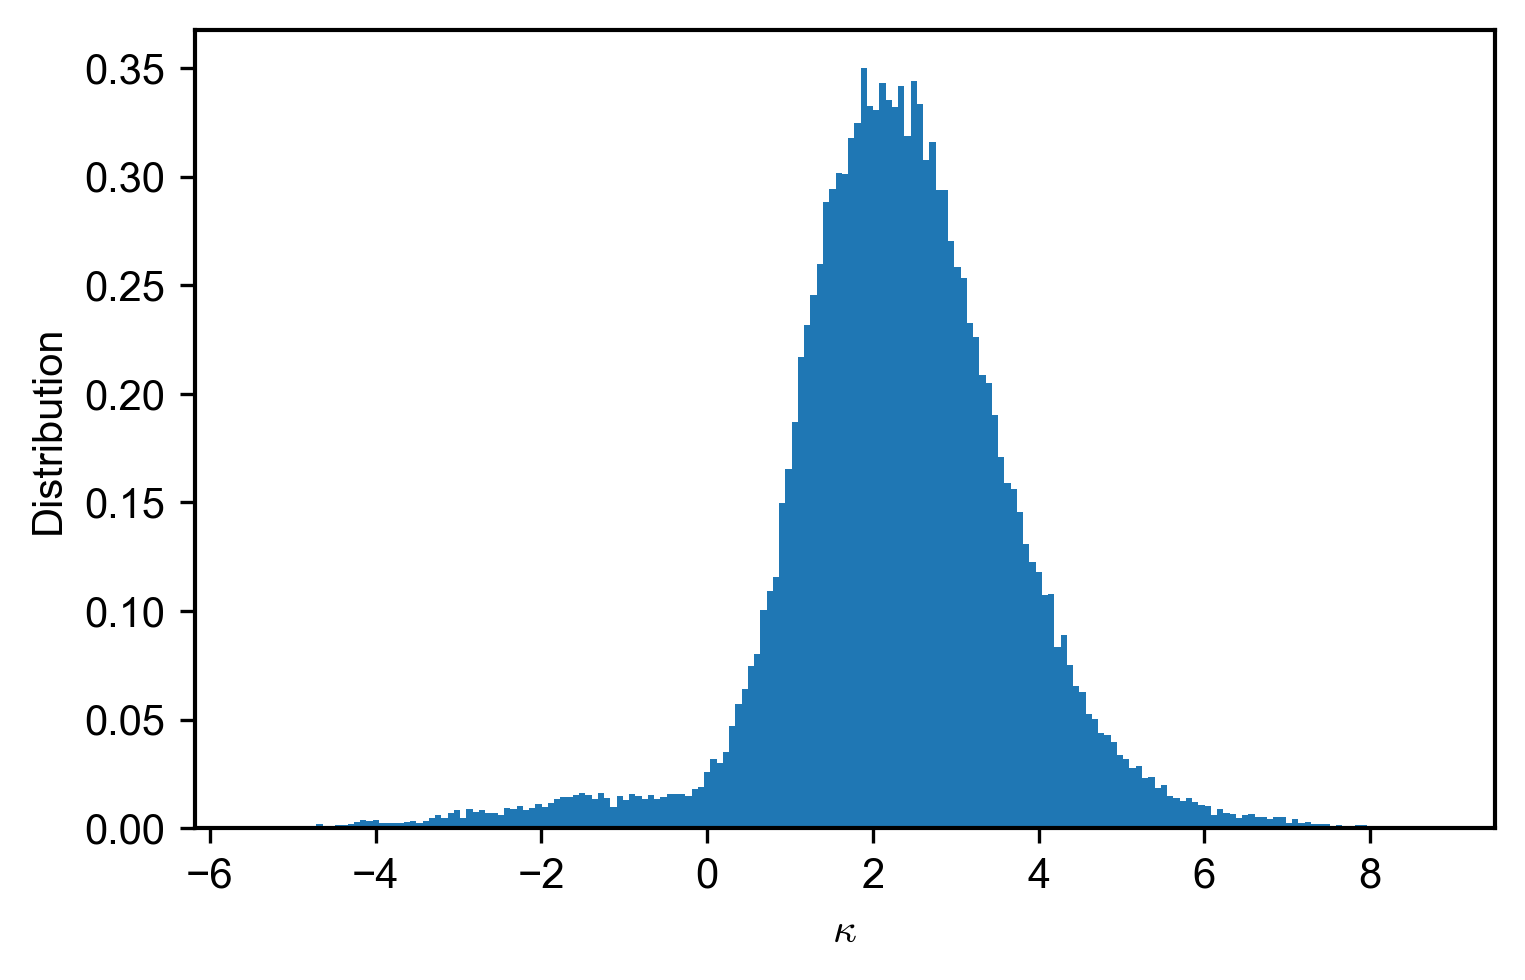

In [18]:
kappas = lgca.get_prop(propname='kappa')
# anim = lgca.animate_density()
# plt.plot(lgca.n_t)
plt.hist(kappas, bins='auto', density=True)
# label axes
plt.xlabel(r'$\kappa$')
plt.ylabel(r'Distribution')
plt.savefig(r'goorgrow/figures/kappa_distribution.svg')
plt.show()

In [15]:
# plt.figure(figsize=figsize)
# lgca.plot_prop_spatial(propname='kappa', cbarlabel=r'$\kappa$')
# plt.ylabel(r'Time $k$')
# plt.xlabel(r'Lattice node $r$')
# plt.savefig(r'goorgrow/figures/local_kappa.svg')
# plt.show()

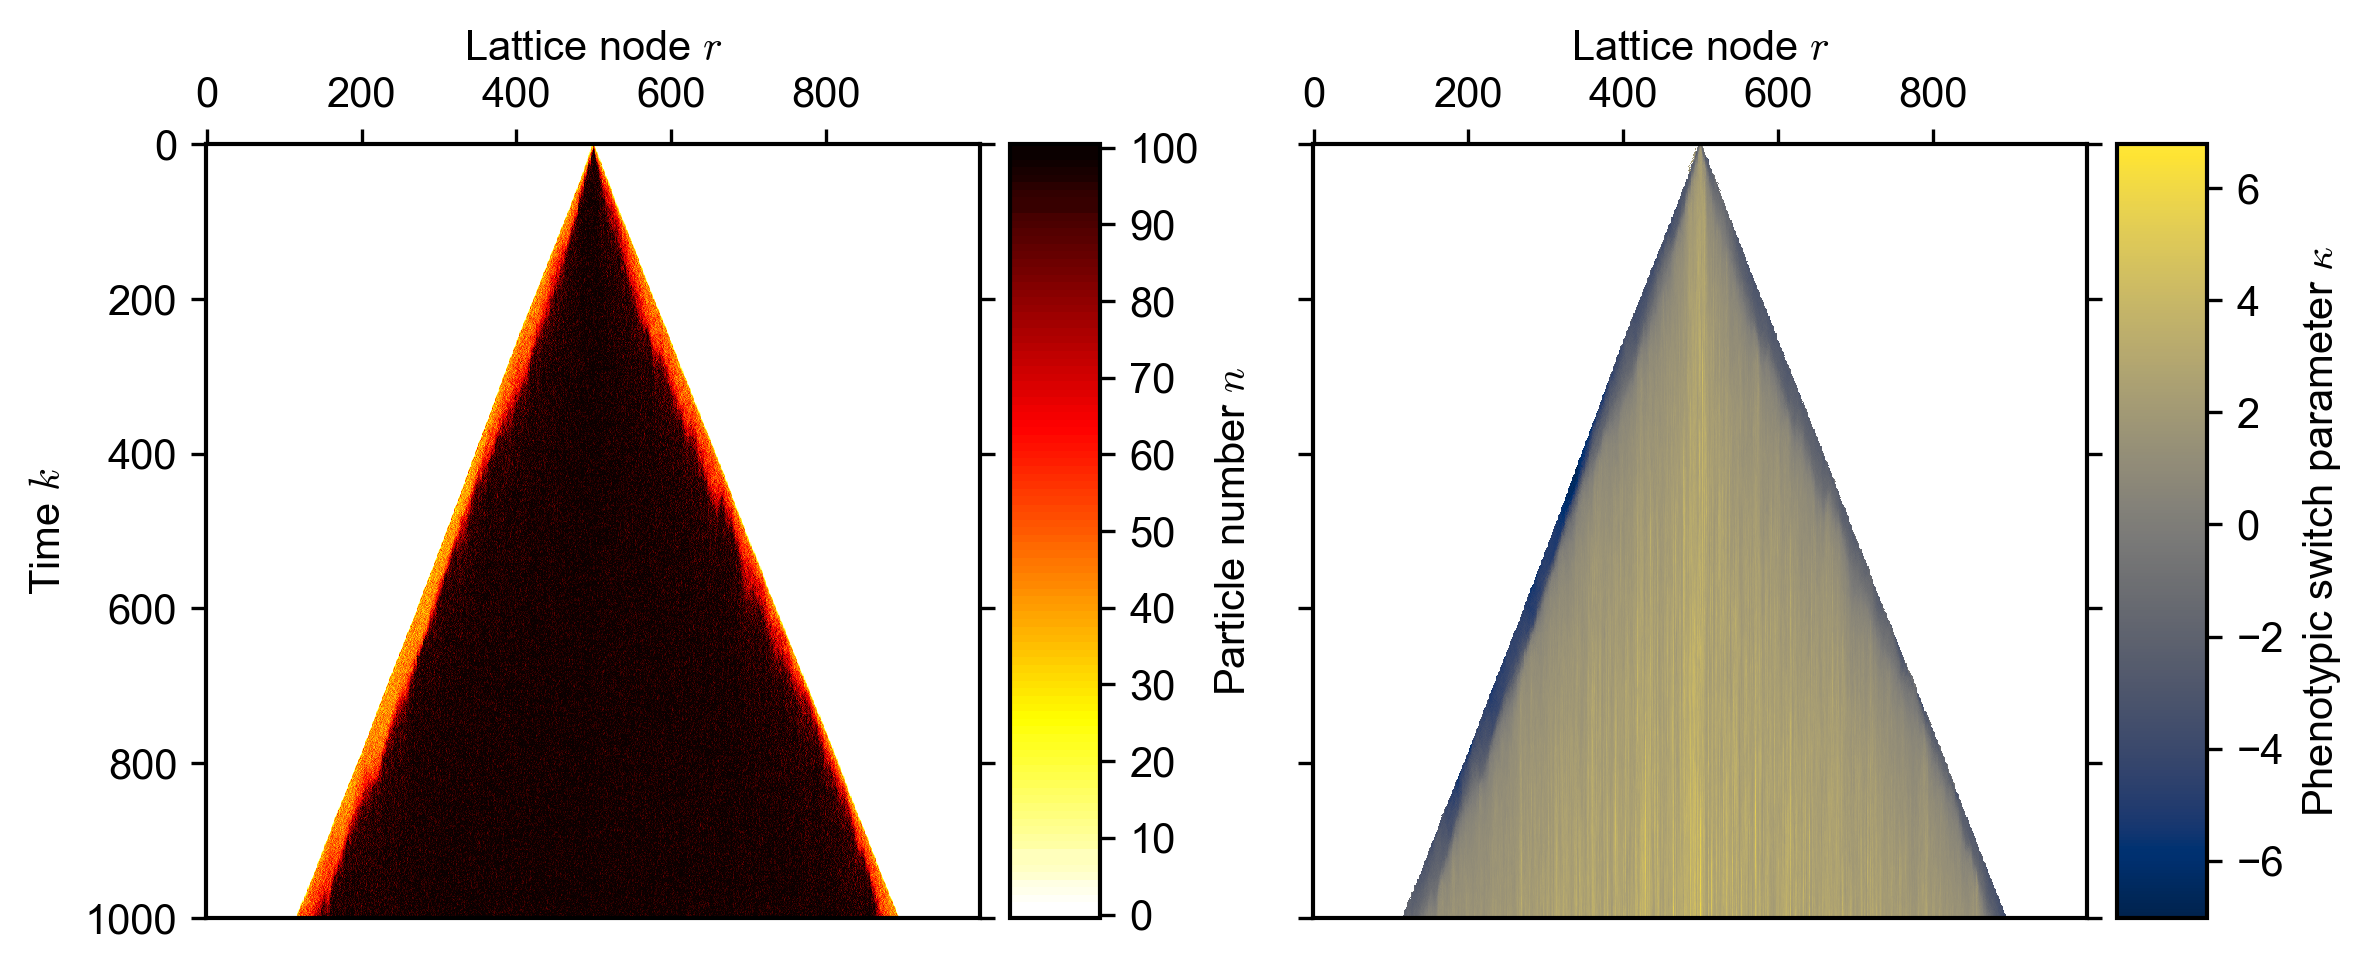

In [17]:
plt.style.use('./frontiers_style.mplstyle')
fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)
plt.sca(axes[0])
lgca.plot_density(absolute_max=100)
plt.ylabel(r'Time $k$')
plt.xlabel(r'Lattice node $r$')
plt.sca(axes[1])
lgca.plot_prop_spatial(propname='kappa', cbarlabel=r'Phenotypic switch parameter $\kappa$')
plt.ylabel(r'')
plt.xlabel(r'Lattice node $r$')
plt.savefig(r'goorgrow/figures/cell_density_and_local_kappa.svg')